# SEO Performance Audit & Optimization Strategy 

## PROJECT DESCRIPTION

#### Key Goals
- Analyze which SEO factors most influence clicks and impressions.
- Identify underperforming pages for optimization (e.g., high impressions, low CTR, poor ranking).
- Recommend specific content and technical improvements (e.g., meta description length, page depth).

#### DATA DESCRIPTION
**Data Source**  
The dataset used in this project was sourced from a publicly available SEO metrics dataset from Kaggle (https://www.kaggle.com/datasets/madmanre/real-website-traffic-prediction). This dataset contains real-world data collected from a live website, integrating insights from three powerful sources: Google Search Console (GSC), Yandex Metrica, and On-page Parsing. 

**Google Search Console (GSC) — Search Performance Metrics-** Search visibility and ranking data.
- Clicks – Number of times users clicked on the website from search results.
- Impressions – Number of times the website appeared in search results.
- Position – Average ranking position in search results.

**Yandex Metrica — Behavioral Analytics-** User interaction and engagement data.
- BounceRate – Proportion of visitors leaving after viewing only one page.
- ViewDepth – Average number of pages viewed per session.
- Segments – Categorization of page type or content type.

**On-page Parsing — Metadata & Structural Elements-** Content and structure extracted directly from pages.
- Title Length – Number of characters in the page title.
- Meta Description Length – Number of characters in the meta description.
- H1 Length – Number of characters in the main heading (H1).
- Word Count – Total number of words on the page.
- Sentence Count – Total number of sentences on the page.
- Folder Depth – Number of directory levels in the URL path.
- Link Score – Metric indicating quality or quantity of links.
- Inlinks – Number of internal links pointing to the page.
- Outlinks – Number of links going out from the page.
- Response Time – Time taken for the server to respond.

**Categorization**
- Traffic data: Clicks, Impressions, Position (Google rank)
- Engagement: BounceRate, ViewDepth, TimeSpent
- Technical SEO: Title Length, Meta Description Length, H1 Length, Word Count, Folder Depth, Link Score, Inlinks, Outlinks, Response Time
- Content category: Segments

In [246]:
# Import libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [248]:
# Read data and separate into columns
data = "data.csv"
df = pd.read_csv(data, delimiter= ";") 

In [252]:
# Get a general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clicks                   9439 non-null   int64  
 1   Impressions              9439 non-null   int64  
 2   Position                 9439 non-null   object 
 3   BounceRate               1649 non-null   object 
 4   ViewDepth                1649 non-null   object 
 5   TimeSpent                1649 non-null   object 
 6   RobotsVisits             1649 non-null   float64
 7   Mobility                 1649 non-null   object 
 8   Segments                 9025 non-null   object 
 9   Title Length             9202 non-null   float64
 10  Meta Description Length  9202 non-null   float64
 11  H1 Length                9202 non-null   float64
 12  Word Count               9202 non-null   float64
 13  Sentence Count           9202 non-null   float64
 14  Folder Depth            

In [254]:
# View a sample of the data
df.head()

,Clicks,Impressions,Position,BounceRate,ViewDepth,TimeSpent,RobotsVisits,Mobility,Segments,Title Length,Meta Description Length,H1 Length,Word Count,Sentence Count,Folder Depth,Link Score,Inlinks,Outlinks,Response Time
0,1939,41950,"8,6","0,099963045","2,657335551",00:11:30,837.0,"0,271618625",NaN,83.0,188.0,0.0,1553.0,367.0,0.0,99.0,24095.0,334.0,"2,185"
1,1798,27042,"8,2","0,314511575","1,15471485",00:00:41,7.0,"0,869000565",product,152.0,227.0,37.0,950.0,377.0,3.0,2.0,173.0,77.0,"1,332"
2,951,18076,"6,3","0,33880422","1,25908558",00:00:53,3.0,"0,852286049",product,101.0,159.0,38.0,858.0,341.0,3.0,1.0,143.0,77.0,"1,759"
3,863,10697,"7,9","0,262893983","1,348853868",00:00:43,3.0,"0,829512894",product,70.0,137.0,24.0,910.0,359.0,3.0,1.0,143.0,77.0,"1,495"
4,822,7269,"17,8","0,221176471","3,207843137",00:02:19,27.0,"0,534117647",NaN,85.0,181.0,24.0,528.0,103.0,2.0,2.0,120.0,334.0,"0,18"


## 1. Data Preparation & Cleaning

Before beginning the analysis, the dataset requires preparation and cleaning to ensure accuracy, consistency, and usability. This process involves transforming data types for proper computation, removing irrelevant or redundant fields, addressing missing values, and standardizing column names for clarity. Additionally, steps may need to be taken to format numerical values for uniformity and to filter out entries that would not contribute meaningful insights. These preparations will create a clean, structured foundation for conducting a reliable SEO performance analysis.

In [261]:
# Convert comma decimals to proper floats where possible
for col in df.columns:
    # Check if column is object type and contains commas
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
        except ValueError:
            pass  # skip columns that can't be converted

df.dtypes

Clicks                       int64
Impressions                  int64
Position                   float64
BounceRate                 float64
ViewDepth                  float64
TimeSpent                   object
RobotsVisits               float64
Mobility                   float64
Segments                    object
Title Length               float64
Meta Description Length    float64
H1 Length                  float64
Word Count                 float64
Sentence Count             float64
Folder Depth               float64
Link Score                 float64
Inlinks                    float64
Outlinks                   float64
Response Time              float64
dtype: object

Position, BounceRate, ViewDepth, Mobility, and Response Time were turned from object types to float

In [264]:
# Drop columns not needed for your SEO analysis
drop_cols = ['TimeSpent', 'RobotsVisits', 'Mobility']
df = df.drop(columns=drop_cols)

print(df.columns)

Index(['Clicks', 'Impressions', 'Position', 'BounceRate', 'ViewDepth',
       'Segments', 'Title Length', 'Meta Description Length', 'H1 Length',
       'Word Count', 'Sentence Count', 'Folder Depth', 'Link Score', 'Inlinks',
       'Outlinks', 'Response Time'],
      dtype='object')


I dropped the 'TimeSpent', 'RobotsVisits', 'Mobility' columns because they were least necessary to my analysis.

In [267]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

No duplicates were detected.

In [270]:
# Check for missing values
df.isna().sum()

Clicks                        0
Impressions                   0
Position                      0
BounceRate                 7790
ViewDepth                  7790
Segments                    414
Title Length                237
Meta Description Length     237
H1 Length                   237
Word Count                  237
Sentence Count              237
Folder Depth                237
Link Score                  237
Inlinks                     237
Outlinks                    237
Response Time               237
dtype: int64

I'm unsure how to handle missing values at this time. The column that stands out is 'Segments' because it is the only object column with missing values.

In [273]:
# View unique values in the column
df['Segments'].unique()

array([nan, 'product', 'catalog', 'brands'], dtype=object)

In [275]:
# Replace nan with unknown
df['Segments'] = df['Segments'].replace(
        ['nan', '', 'None', 'NaN'], np.nan
    ).fillna('unknown')

The 'nan' in the Segments column signifies missing, but it's probably more appropriate to say it's 'unknown'. This indicates the page exists but we don't know which category it belongs to.

In [278]:
# Lowercase the column names and replace whitespace with underscore
df.columns = (
    df.columns
    .str.lower()
    .str.replace(' ', '_')
    .str.replace(r'[^\w]', '_', regex=True)  # Replace non-alphanumeric with underscore
)

I lowercased the column names and replaced whitespace with underscores for continuity

In [281]:
# View changes
df.head(15)

,clicks,impressions,position,bouncerate,viewdepth,segments,title_length,meta_description_length,h1_length,word_count,sentence_count,folder_depth,link_score,inlinks,outlinks,response_time
0,1939,41950,8.6,0.099963,2.657336,unknown,83.0,188.0,0.0,1553.0,367.0,0.0,99.0,24095.0,334.0,2.185
1,1798,27042,8.2,0.314512,1.154715,product,152.0,227.0,37.0,950.0,377.0,3.0,2.0,173.0,77.0,1.332
2,951,18076,6.3,0.338804,1.259086,product,101.0,159.0,38.0,858.0,341.0,3.0,1.0,143.0,77.0,1.759
3,863,10697,7.9,0.262894,1.348854,product,70.0,137.0,24.0,910.0,359.0,3.0,1.0,143.0,77.0,1.495
4,822,7269,17.8,0.221176,3.207843,unknown,85.0,181.0,24.0,528.0,103.0,2.0,2.0,120.0,334.0,0.180
5,684,25453,21.3,0.213465,1.435140,catalog,111.0,193.0,27.0,3878.0,1865.0,5.0,1.0,34.0,200.0,3.275
6,595,7564,3.5,0.354125,1.174044,product,217.0,272.0,83.0,1157.0,441.0,3.0,1.0,175.0,77.0,1.453
7,550,33933,14.5,0.332589,1.453125,catalog,122.0,191.0,25.0,4671.0,2256.0,5.0,1.0,71.0,333.0,4.224
8,542,13191,7.8,0.262877,1.584369,product,198.0,276.0,77.0,836.0,304.0,3.0,1.0,225.0,62.0,1.570
9,533,10371,10.4,0.330816,1.185801,product,142.0,197.0,38.0,1272.0,499.0,3.0,1.0,125.0,77.0,1.399


In [283]:
# Rename selected columns
df = df.rename(columns={
    'bouncerate': 'bounce_rate',
    'viewdepth': 'view_depth',
    'inlinks': 'in_links',
    'outlinks': 'out_links'
})
# View the columns
df.columns

Index(['clicks', 'impressions', 'position', 'bounce_rate', 'view_depth',
       'segments', 'title_length', 'meta_description_length', 'h1_length',
       'word_count', 'sentence_count', 'folder_depth', 'link_score',
       'in_links', 'out_links', 'response_time'],
      dtype='object')

I had to change the names of 4 additional columns ('bouncerate', 'viewdepth', 'inlinks', and 'outlinks' to separate the words with underscores.

In [286]:
# Round all numeric columns to 2 decimals
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].round(2)

In [288]:
df.head()

,clicks,impressions,position,bounce_rate,view_depth,segments,title_length,meta_description_length,h1_length,word_count,sentence_count,folder_depth,link_score,in_links,out_links,response_time
0,1939,41950,8.6,0.10,2.66,unknown,83.0,188.0,0.0,1553.0,367.0,0.0,99.0,24095.0,334.0,2.18
1,1798,27042,8.2,0.31,1.15,product,152.0,227.0,37.0,950.0,377.0,3.0,2.0,173.0,77.0,1.33
2,951,18076,6.3,0.34,1.26,product,101.0,159.0,38.0,858.0,341.0,3.0,1.0,143.0,77.0,1.76
3,863,10697,7.9,0.26,1.35,product,70.0,137.0,24.0,910.0,359.0,3.0,1.0,143.0,77.0,1.50
4,822,7269,17.8,0.22,3.21,unknown,85.0,181.0,24.0,528.0,103.0,2.0,2.0,120.0,334.0,0.18


I rounded all of the floats to two decimal places for simplicity and structure.

In [291]:
# Count rows with more than 3 missing values
rows_with_many_nans = (df.isna().sum(axis=1) > 3).sum()

print(f"Number of rows with more than 3 missing values: {rows_with_many_nans}")

Number of rows with more than 3 missing values: 237


In [293]:
# Drop rows with more than 3 missing values
df = df[df.isna().sum(axis=1) <= 3]

# Reset index after deletion
df = df.reset_index(drop=True)

print(f"Remaining rows: {len(df)}")

Remaining rows: 9202


After trying to evaluate the top 10 rows with the highest ctr by segments, I discovered a few rows with high ctr and over 3 missing values in the row. It's not beneficial to the analysis to keep the 237 entries out of 9439 that are missing that many features. So they have been removed.

#### 1.1 SUMMARY OF DATA PREPARATION AND CLEANING

<div style="background-color:#e6f4ea; padding:10px; border-radius:5px;">
In preparing and cleaning the dataset, I converted key numeric fields such as <code>`position`</code>, <code>`bounce_rate`</code>, <code>`view_depth`</code>, <code>`mobility`</code>, and <code>`response_time`</code> from object type to float to ensure compatibility for analysis. I removed unnecessary columns, including <code>`time_spent`</code>, <code>`robots_visits`</code>, and <code>`mobility`</code>, to streamline the dataset and confirmed that there were no duplicate records. For missing values, I reclassified `nan` in the `segments` column as “unknown” to indicate uncategorized but existing pages. To maintain consistency, I standardized all column names by lowercasing and replacing spaces with underscores, and also renamed columns like <code>`bouncerate`</code>, <code>`viewdepth`</code>, <code>`inlinks`</code>, and `outlinks` for clarity. All float values were rounded to two decimal places for uniformity. Finally, I removed 237 records out of 9,439 that had high CTR but more than three missing features, as keeping them would have introduced unnecessary noise into the analysis.
</div>

## 2. Exploratory Data Anaylsis

The goal of the exploratory data analysis (EDA) is to uncover patterns, relationships, and potential areas of improvement in the website’s search performance. Specifically, Im aiming to determine which SEO factors most influence user engagement, measured through clicks and impressions, and to evaluate overall visibility and ranking health. Through statistical summaries, custom feature engineering of the click-through rate (CTR), and performance comparisons to industry benchmarks, the EDA will provide a clear snapshot of where the site stands. 

In [344]:
# Get a statistical overview of the data
df.describe()

,clicks,impressions,position,bounce_rate,view_depth,title_length,meta_description_length,h1_length,word_count,sentence_count,folder_depth,link_score,in_links,out_links,response_time,ctr
count,9202.000000,9202.000000,9202.000000,1412.00000,1412.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000
mean,5.604651,312.730493,14.564714,0.31796,1.509802,119.533797,194.440991,37.177896,1685.546403,777.028689,3.314714,1.450663,232.896218,155.019670,1.957384,1.942553
std,40.127895,1463.689466,11.187061,0.13695,0.570615,37.509282,30.987736,20.381050,1189.347529,623.263471,0.616283,4.387121,1651.874279,79.055586,0.884704,5.586403
min,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,7.100000,0.22000,1.180000,92.000000,182.000000,21.000000,924.000000,376.000000,3.000000,1.000000,36.000000,77.000000,1.410000,0.000000
50%,0.000000,37.000000,10.500000,0.31000,1.330000,112.000000,193.000000,33.000000,1124.000000,457.000000,3.000000,1.000000,51.000000,184.000000,1.780000,0.000000
75%,2.000000,153.750000,18.600000,0.40000,1.620000,142.750000,208.000000,51.000000,2179.000000,1000.250000,4.000000,1.000000,97.000000,199.000000,2.650000,2.040816
max,1939.000000,41950.000000,117.200000,0.85000,5.830000,303.000000,370.000000,118.000000,5309.000000,2410.000000,5.000000,99.000000,38526.000000,1597.000000,6.730000,100.000000


I pulled a statistical overview of the data.

In [347]:
# Overall click through rate for the entire website
CTR_overall = (df['clicks'].sum() / df['impressions'].sum()) * 100

print(f"The overall click-through rate is: {CTR_overall:.2f}%")

The overall click-through rate is: 1.79%


I calculated the overall click-through rate for the entire website which is 1.79%.

In [350]:
# Click through rate per page and add as a column
df['ctr'] = (df['clicks'] / df['impressions']) * 100

df.head()

,clicks,impressions,position,bounce_rate,view_depth,segments,title_length,meta_description_length,h1_length,word_count,sentence_count,folder_depth,link_score,in_links,out_links,response_time,ctr
0,1939,41950,8.6,0.10,2.66,unknown,83.0,188.0,0.0,1553.0,367.0,0.0,99.0,24095.0,334.0,2.18,4.622169
1,1798,27042,8.2,0.31,1.15,product,152.0,227.0,37.0,950.0,377.0,3.0,2.0,173.0,77.0,1.33,6.648917
2,951,18076,6.3,0.34,1.26,product,101.0,159.0,38.0,858.0,341.0,3.0,1.0,143.0,77.0,1.76,5.261120
3,863,10697,7.9,0.26,1.35,product,70.0,137.0,24.0,910.0,359.0,3.0,1.0,143.0,77.0,1.50,8.067683
4,822,7269,17.8,0.22,3.21,unknown,85.0,181.0,24.0,528.0,103.0,2.0,2.0,120.0,334.0,0.18,11.308296


Feature-engineered a click-through rate column as a percentage for each page.

In [353]:
avg_ctr = df['ctr'].mean()
print(f"The average click-through rate is: {avg_ctr:.2f}%")

The average click-through rate is: 1.94%


Industry standard for organic traffic of Google positions of 6-10 holds an average click-through rate of 2-5%. This website holds an average Google position of 14 and an average click-through rate of 1.94%. 

In [356]:
top10_ctr_per_segment = (
    df.sort_values('ctr', ascending=False)
      .groupby('segments')
      .head(10)
)

top10_ctr_per_segment

,clicks,impressions,position,bounce_rate,view_depth,segments,title_length,meta_description_length,h1_length,word_count,sentence_count,folder_depth,link_score,in_links,out_links,response_time,ctr
2881,1,1,3.0,NaN,NaN,catalog,120.0,204.0,35.0,1971.0,786.0,4.0,1.0,68.0,346.0,1.65,100.000000
3777,1,1,3.0,NaN,NaN,catalog,103.0,194.0,28.0,4664.0,2254.0,5.0,1.0,67.0,330.0,3.98,100.000000
4053,1,1,4.0,NaN,NaN,brands,81.0,210.0,7.0,537.0,187.0,3.0,1.0,44.0,138.0,0.81,100.000000
3947,1,1,1.0,NaN,NaN,unknown,68.0,144.0,11.0,382.0,91.0,3.0,2.0,231.0,318.0,0.29,100.000000
3954,1,1,5.0,NaN,NaN,unknown,69.0,145.0,13.0,382.0,91.0,3.0,2.0,231.0,318.0,0.32,100.000000
2714,1,1,6.0,NaN,NaN,catalog,83.0,184.0,18.0,847.0,377.0,3.0,1.0,41.0,191.0,1.73,100.000000
3616,1,1,6.0,NaN,NaN,catalog,69.0,177.0,11.0,4265.0,2118.0,3.0,1.0,80.0,302.0,3.57,100.000000
3421,1,1,4.0,NaN,NaN,catalog,117.0,200.0,36.0,3566.0,1783.0,4.0,1.0,33.0,192.0,3.34,100.000000
3367,1,1,5.0,NaN,NaN,product,150.0,195.0,57.0,938.0,376.0,3.0,1.0,53.0,59.0,1.85,100.000000
3365,1,1,10.0,NaN,NaN,catalog,100.0,190.0,29.0,3780.0,1879.0,4.0,1.0,38.0,221.0,3.18,100.000000


I wanted to get an idea of the performance metrics for the top-performing pages by 'segments'

#### 2.1 SUMMARY OF EXPLORATORY DATA ANALYSIS
<div style="background-color:#e6f4ea; padding:10px; border-radius:5px;">

During the exploratory data analysis, I began by calculating the click-through rate (CTR) to measure the percentage of users who clicked a search result after seeing it, using the formula <code>(Clicks / Impressions) * 100</code>. This provided both an overall CTR for the entire website (1.79%) and a page-level CTR for deeper insights. I generated a statistical overview of the dataset to understand the distribution and ranges of key metrics. Comparing these results to industry standards, I found that while organic traffic for Google positions 6–10 typically sees a CTR of 2–5%, this website averages a Google position of 14 with a CTR of 1.94%, indicating room for improvement in both ranking and click performance. To further assess performance, I examined the top-performing pages within each <code>segment</code> category, allowing for targeted analysis of strengths and weaknesses across different sections of the site.
</div>

## 3. Visualizations of SEO Performance 

In [361]:
# Identify columns to plot
cols_to_plot = [
    'clicks', 'impressions', 'title_length', 'meta_description_length',
    'h1_length', 'word_count', 'sentence_count', 'folder_depth', 
    'link_score', 'in_links', 'out_links', 'response_time', 'ctr'
]

#### 3.1 CATALOG SEGMENT

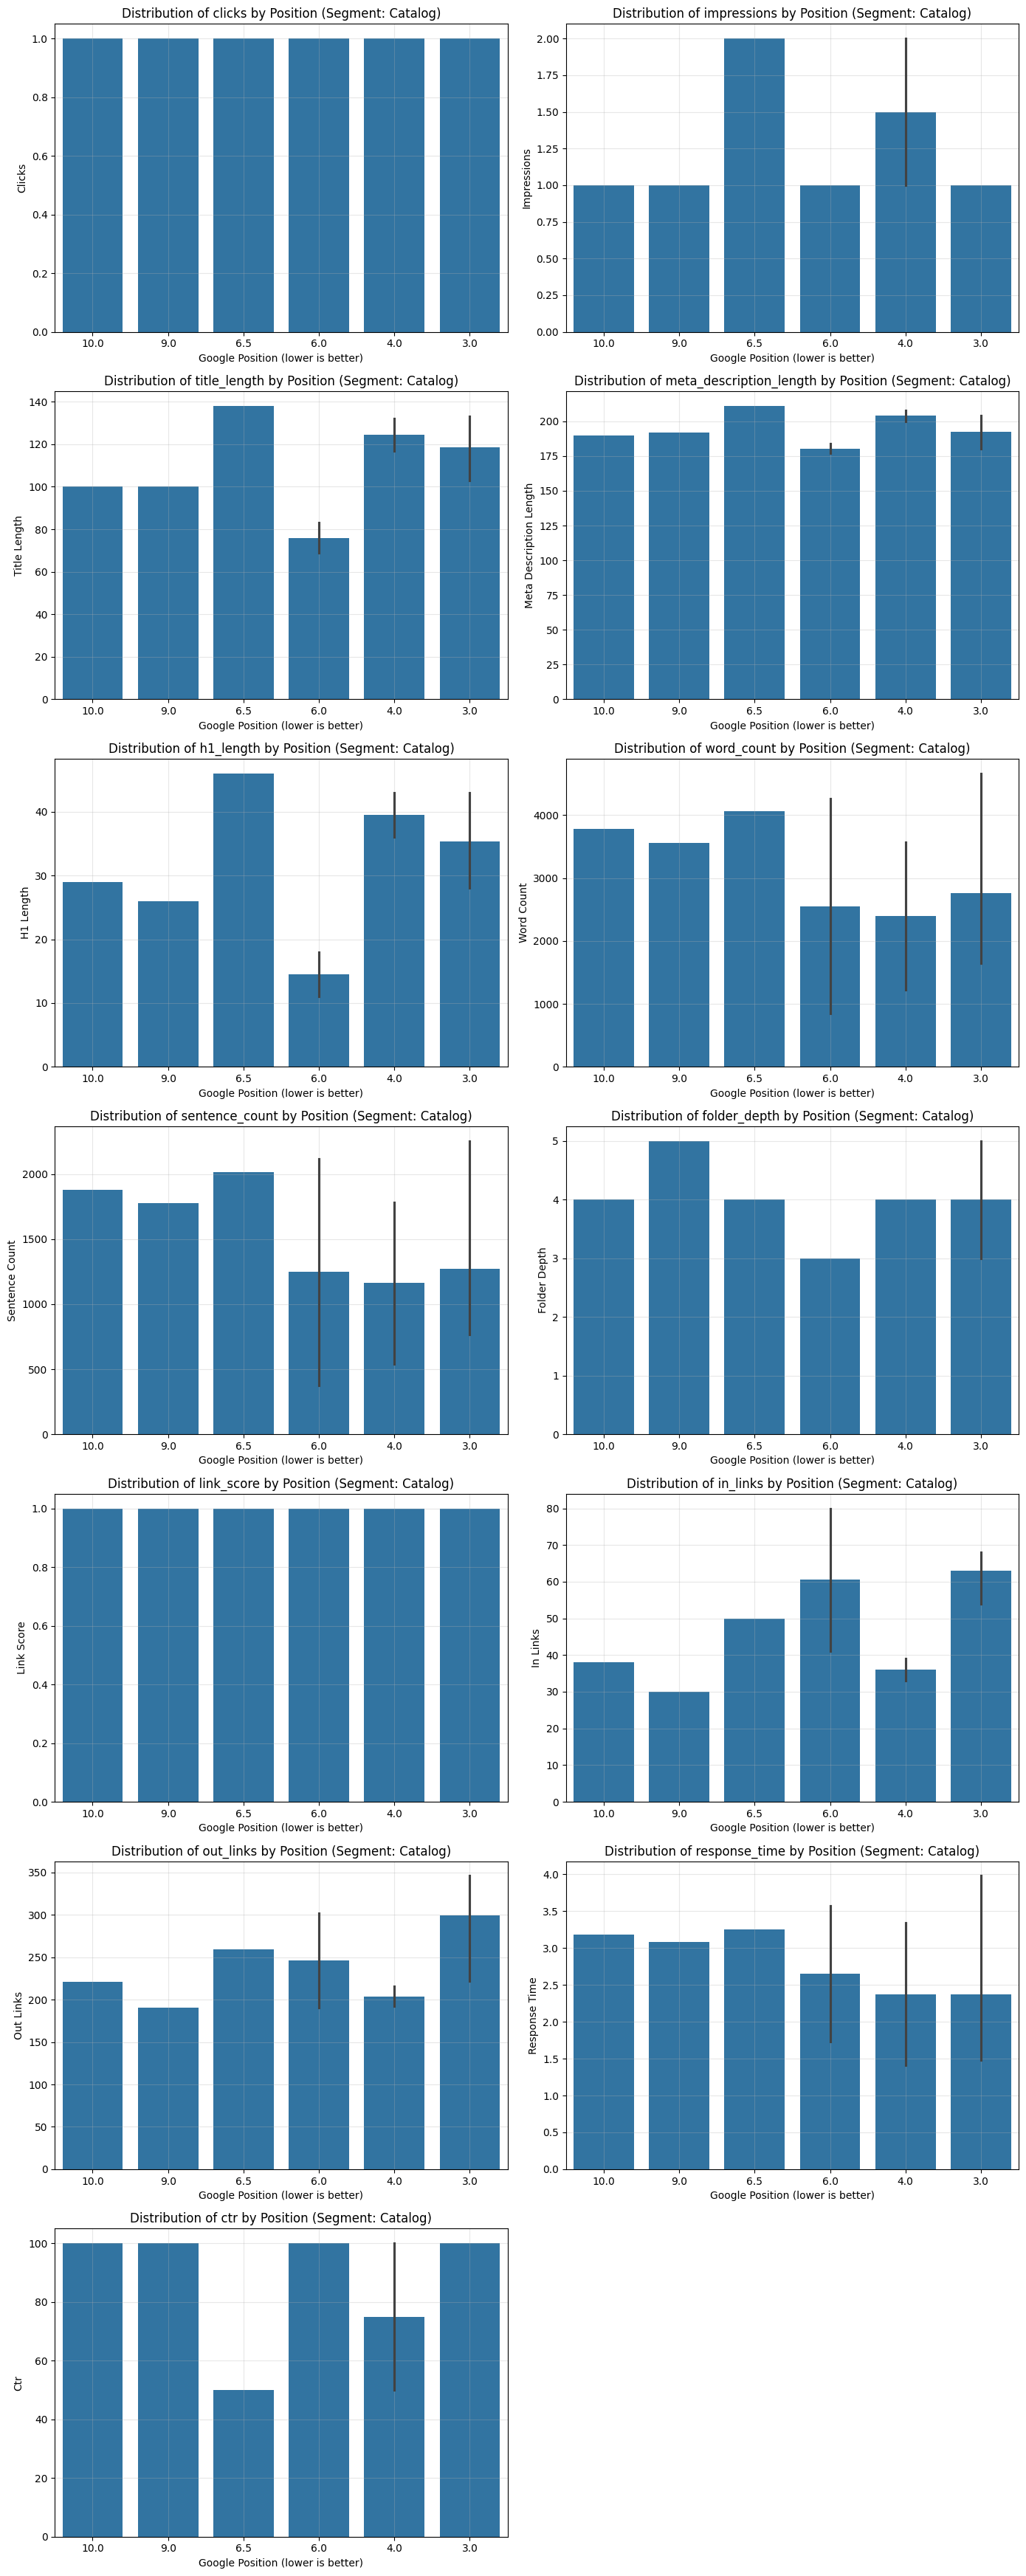

In [170]:
# Filter dataset for catalog segment only
catalog_df = top10_ctr_per_segment[top10_ctr_per_segment['segments'] == 'catalog'].copy()

# Number of columns per row
cols_per_row = 2
num_plots = len(cols_to_plot)
rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(cols_to_plot):
    sns.barplot(data=catalog_df, x='position', y=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Position (Segment: Catalog)")
    axes[i].set_xlabel("Google Position (lower is better)")
    axes[i].set_ylabel(col.replace('_', ' ').title())
    axes[i].invert_xaxis()  # Best positions on the left
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as PNG
plt.savefig("catalog_segment_position_vs_metrics.png", dpi=300)

plt.show()

In the <code>catalog</code> segment, pages in <code>position</code> 1 achieved the highest <code>ctr</code>, supported by strong <code>in_links</code> and <code>out_links</code>, while positions 6–9 underperformed despite often having higher <code>word_count</code> and <code>title_length</code>. This suggests that simply increasing content length does not guarantee better engagement. High <code>impressions</code> in these mid-range positions were not matched by clicks, indicating that snippet optimization is needed to improve user appeal. Additionally, longer <code>meta_description_length</code> and deeper <code>folder_depth</code> tended to correlate with lower performance, implying that more concise metadata and a simplified site structure could enhance both visibility and click-through rates.




#### 3.2 PRODUCT SEGMENT

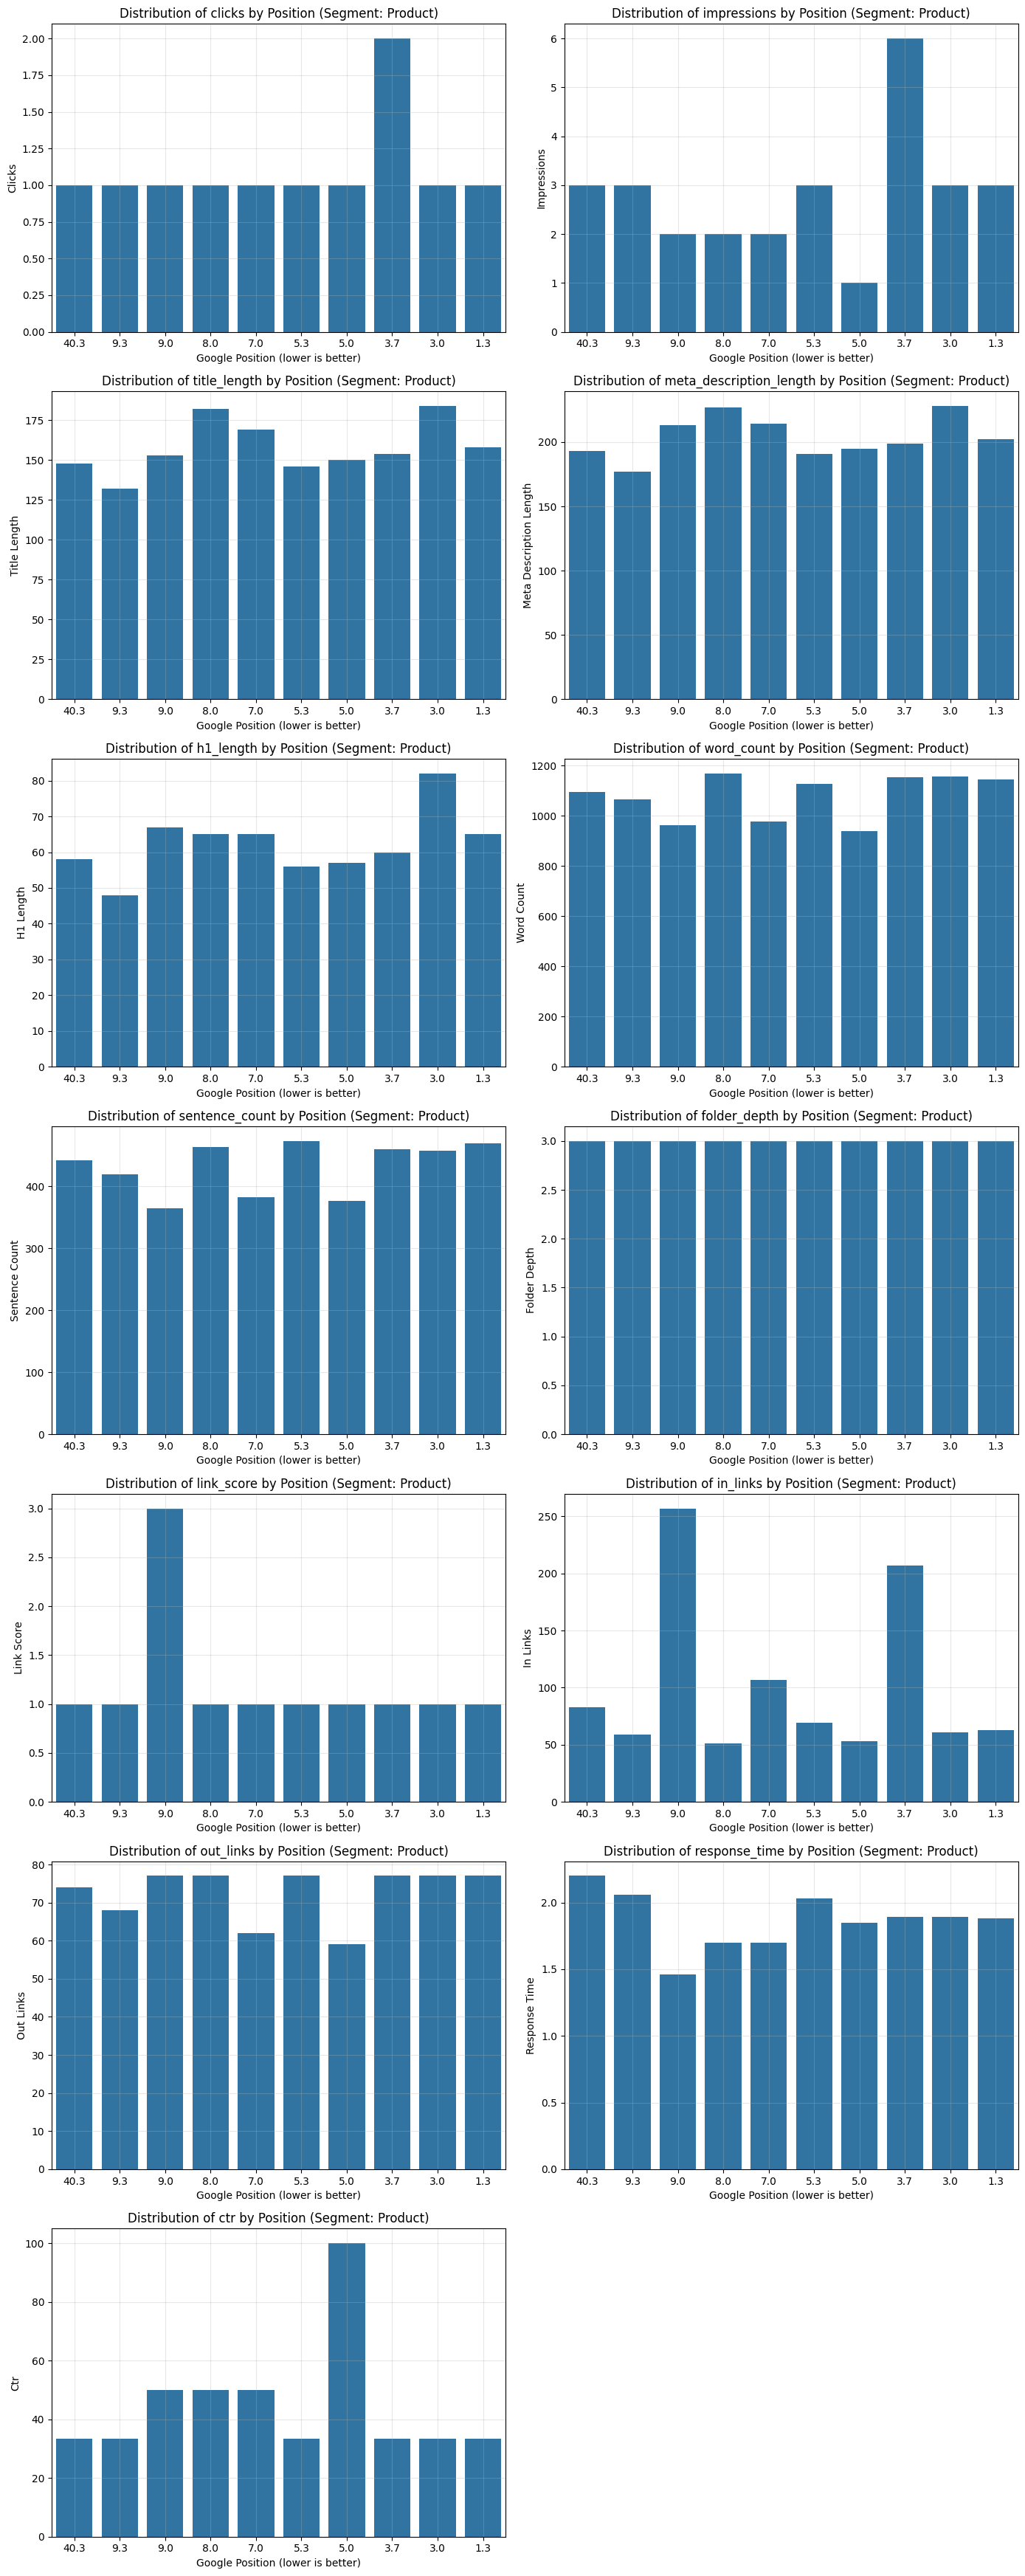

In [172]:
# Filter dataset for product segment only
product_df = top10_ctr_per_segment[top10_ctr_per_segment['segments'] == 'product'].copy()

# Number of columns per row
cols_per_row = 2
num_plots = len(cols_to_plot)
rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(cols_to_plot):
    sns.barplot(data=product_df, x='position', y=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Position (Segment: Product)")
    axes[i].set_xlabel("Google Position (lower is better)")
    axes[i].set_ylabel(col.replace('_', ' ').title())
    axes[i].invert_xaxis()  # Best positions on the left
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as PNG
plt.savefig("product_segment_position_vs_metrics.png", dpi=300)

plt.show()

In the <code>product</code> segment, pages in <code>position</code> 1 consistently achieved the highest <code>ctr</code> with balanced <code>title_length</code> and <code>meta_description_length</code>, supported by strong <code>in_links</code> and <code>out_links</code>. Positions 6–9, however, showed high <code>impressions</code> but significantly lower <code>ctr</code>, indicating that while these pages are visible, their titles and descriptions may not be compelling enough to drive clicks. Higher <code>word_count</code> and <code>sentence_count</code> in these positions did not translate into better engagement, suggesting that quality and relevance outweigh sheer content volume. Additionally, slower <code>response_time</code> and deeper <code>folder_depth</code> correlated with weaker performance, highlighting the need for faster load speeds and streamlined site architecture.


#### 3.3 BRANDS SEGMENT

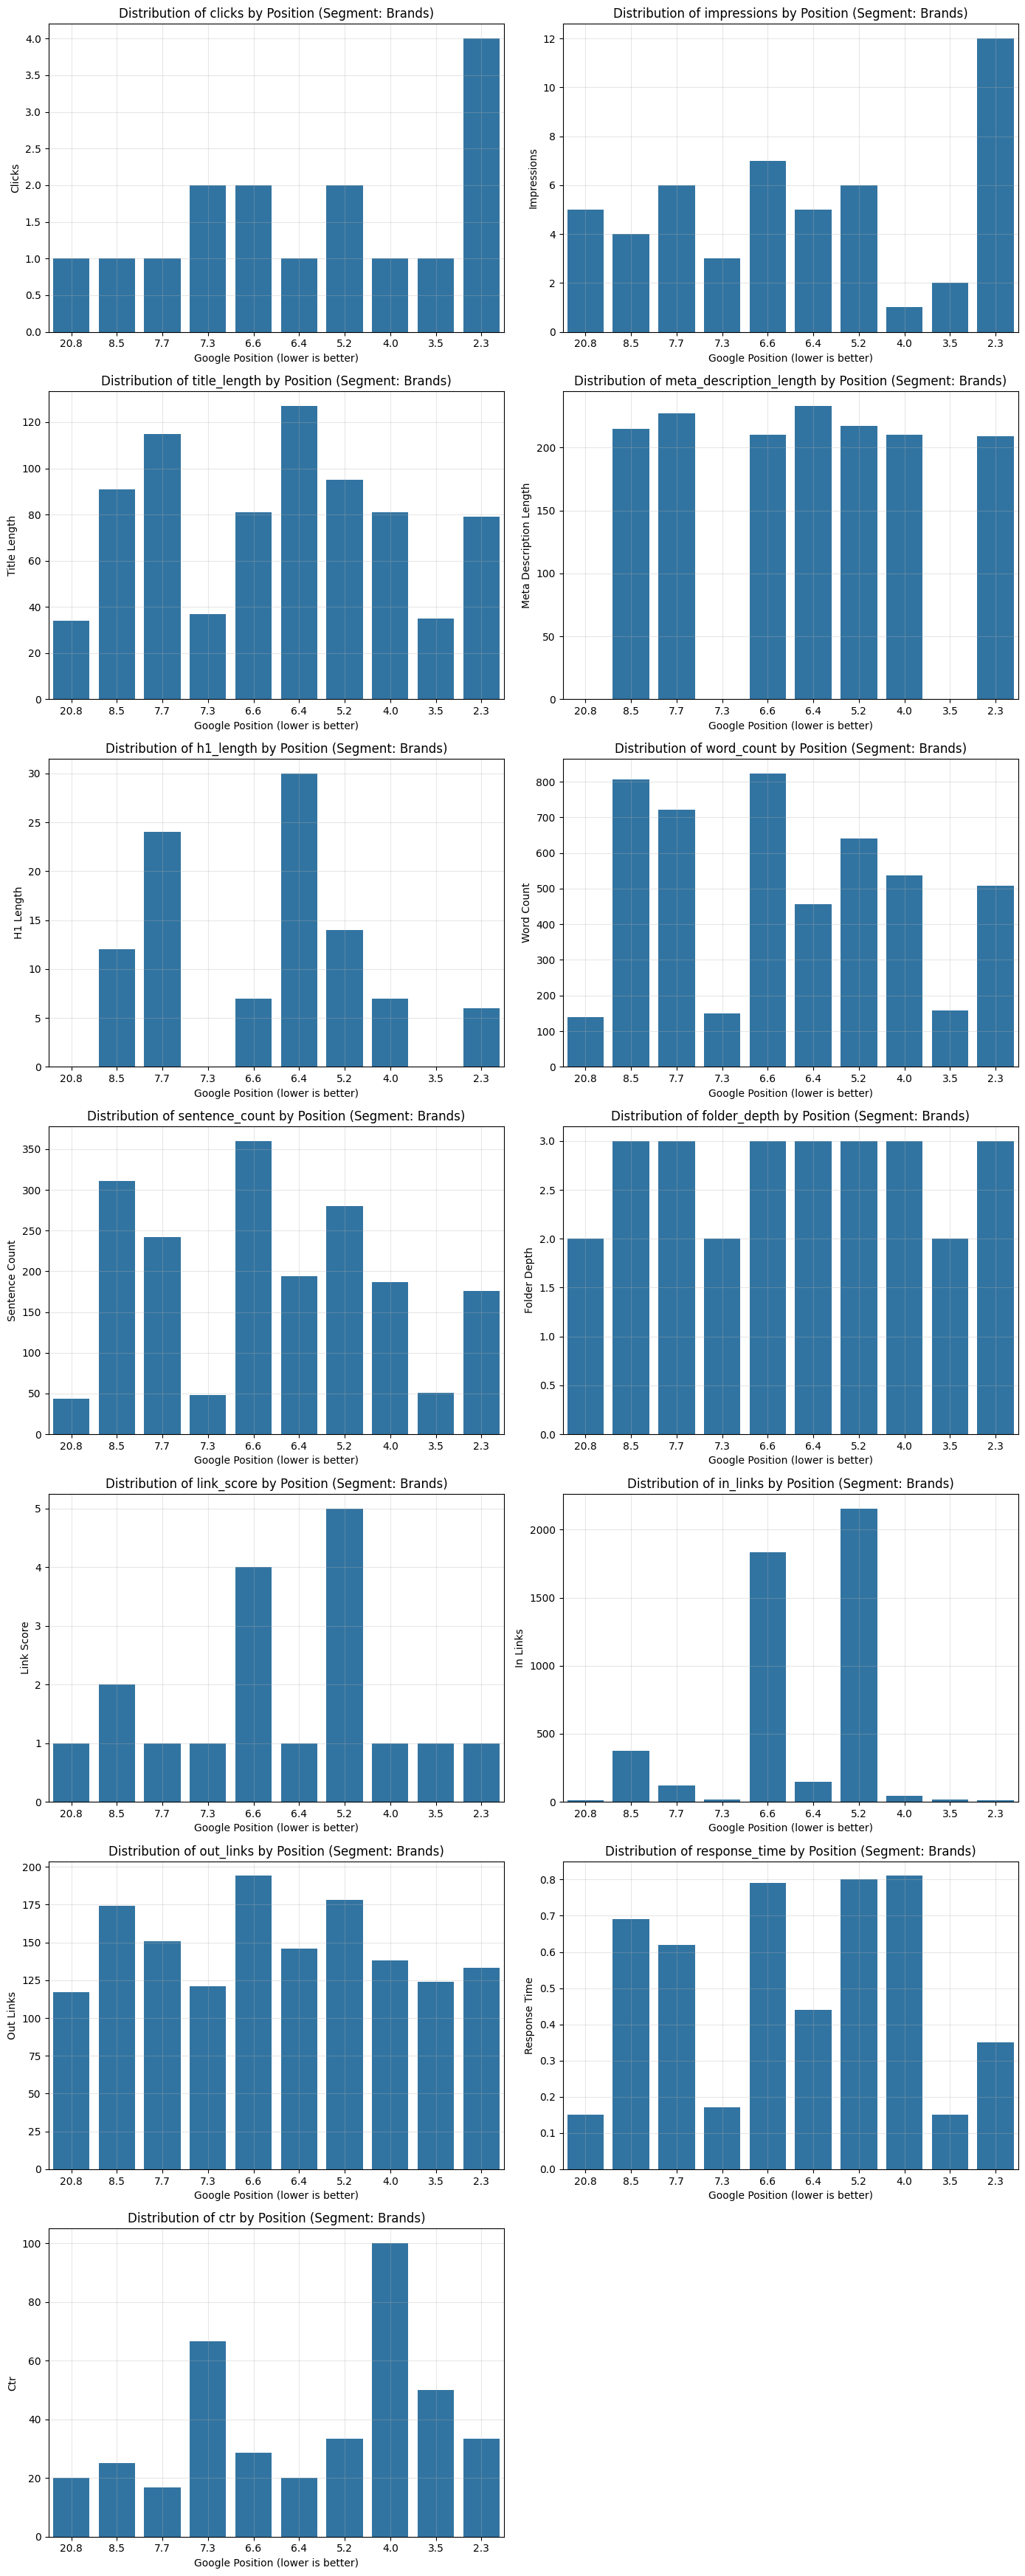

In [174]:
# Filter dataset for brands segment only
brands_df = top10_ctr_per_segment[top10_ctr_per_segment['segments'] == 'brands'].copy()

# Number of columns per row
cols_per_row = 2
num_plots = len(cols_to_plot)
rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(cols_to_plot):
    sns.barplot(data=brands_df, x='position', y=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Position (Segment: Brands)")
    axes[i].set_xlabel("Google Position (lower is better)")
    axes[i].set_ylabel(col.replace('_', ' ').title())
    axes[i].invert_xaxis()  # Best positions on the left
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as PNG
plt.savefig("brands_segment_position_vs_metrics.png", dpi=300)

plt.show()

In the <code>brands</code> segment, <code>position</code> 4 achieved the highest <code>ctr</code> (100%) with balanced <code>word_count</code> (500) and strong <code>in_links</code>, while top positions (2–4) generally outperformed in engagement. Mid-range positions (6–8.5) showed high <code>impressions</code> but lower <code>ctr</code>, often paired with long <code>title_length</code> (120 chars), extended <code>meta_description_length</code> (200+ chars), and high <code>word_count</code> (~800+), suggesting that excessive length does not guarantee clicks. Some pages with the highest <code>in_links</code> still underperformed, showing that internal linking alone is insufficient without optimized titles and snippets. Additionally, slower <code>response_time</code> in these mid positions may be further reducing CTR, while faster-loading pages in higher positions correlate with stronger engagement.


#### 3.4 Unknown Segment

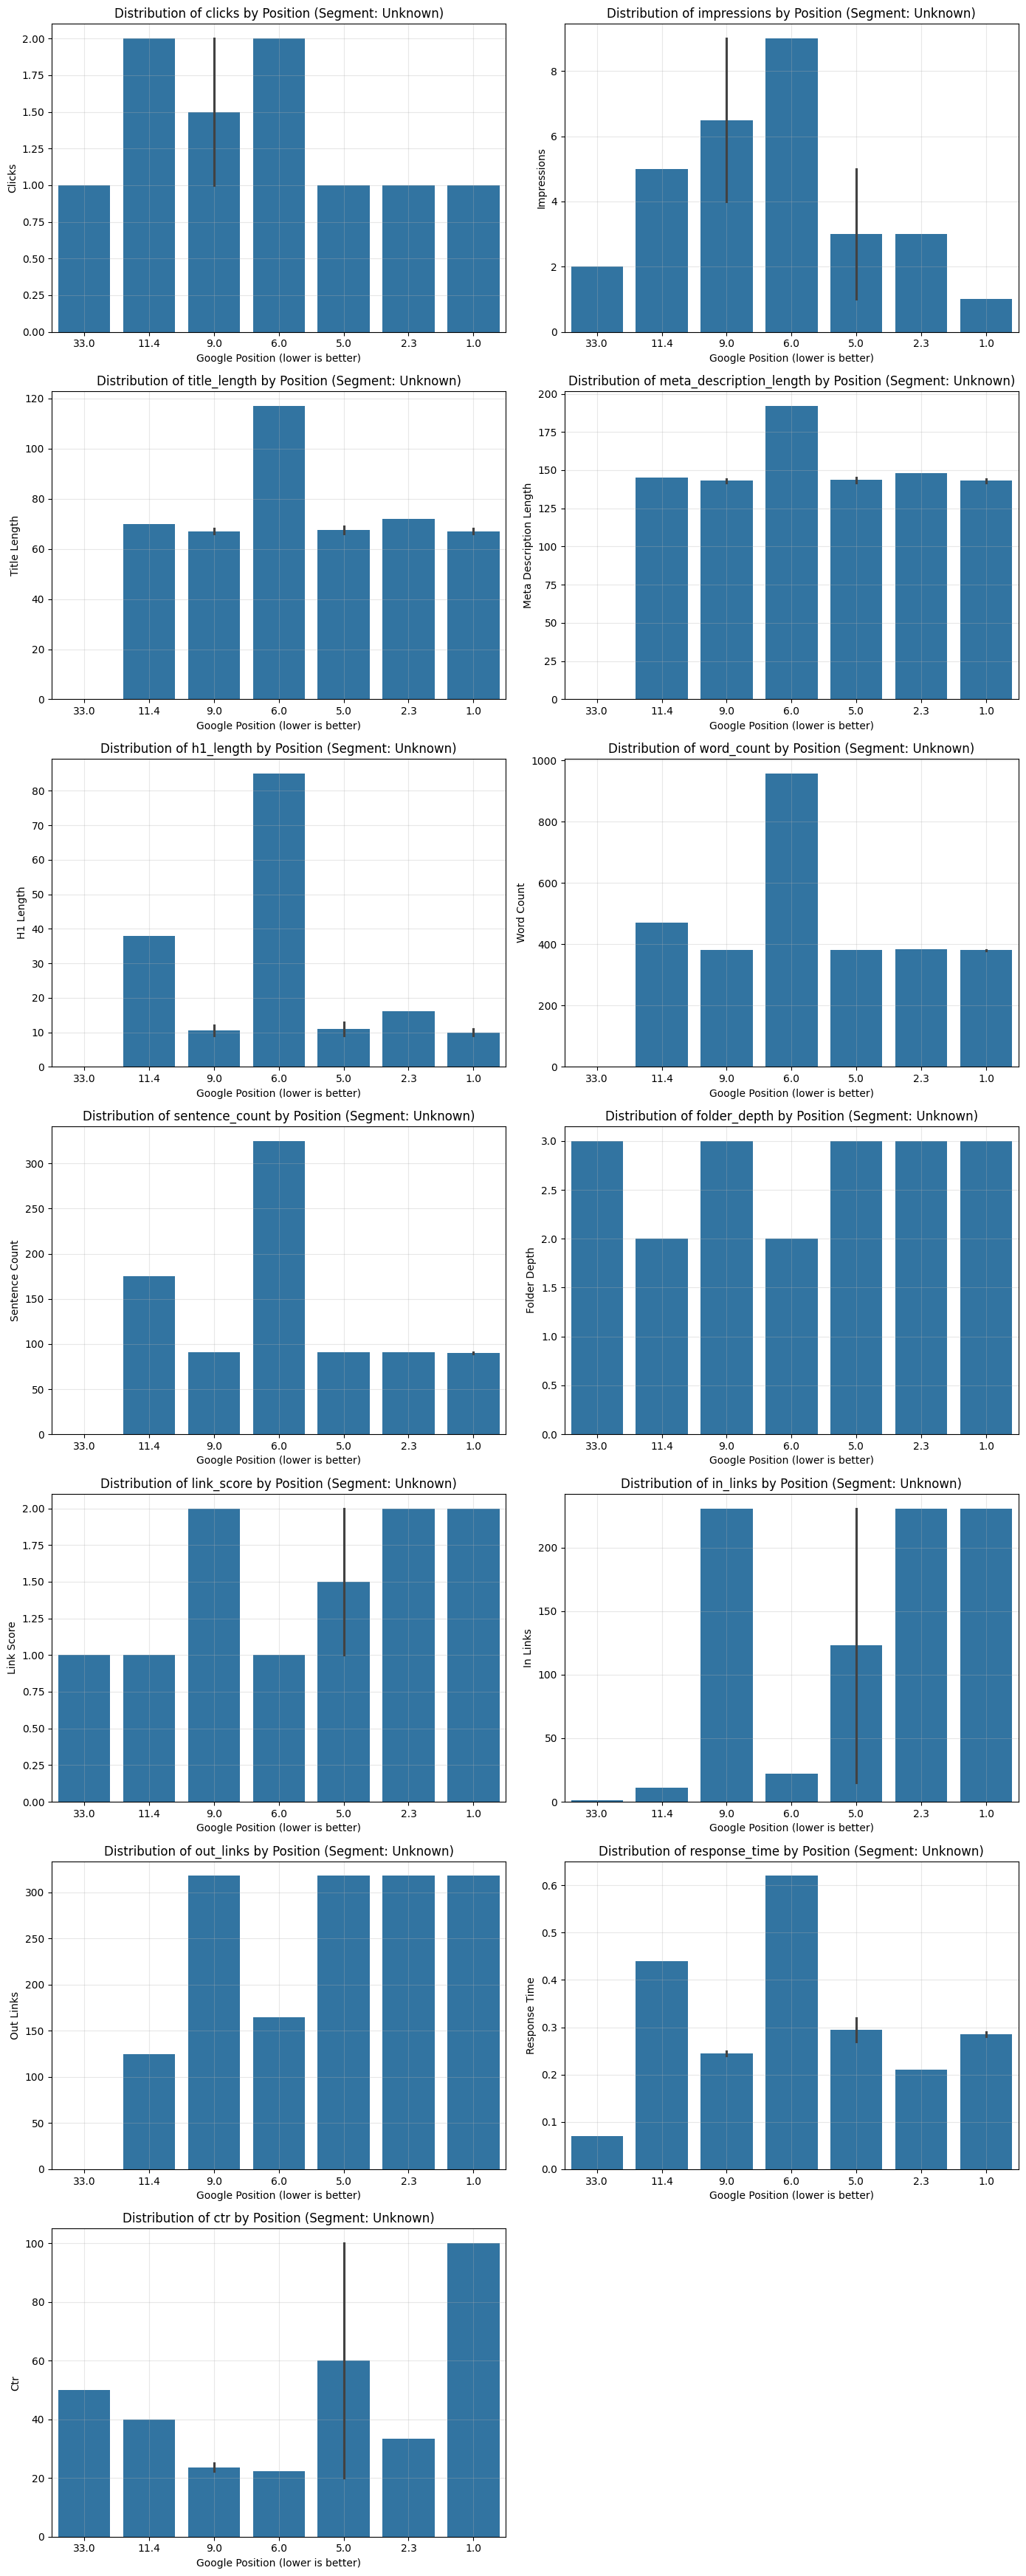

In [181]:
# Filter dataset for unknown segment only
unknown_df = top10_ctr_per_segment[top10_ctr_per_segment['segments'] == 'unknown'].copy()

# Number of columns per row
cols_per_row = 2
num_plots = len(cols_to_plot)
rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(cols_to_plot):
    sns.barplot(data=unknown_df, x='position', y=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Position (Segment: Unknown)")
    axes[i].set_xlabel("Google Position (lower is better)")
    axes[i].set_ylabel(col.replace('_', ' ').title())
    axes[i].invert_xaxis()  # Best positions on the left
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as PNG
plt.savefig("unknown_segment_position_vs_metrics.png", dpi=300)

plt.show()

In the,<code>unknown</code> segment, <code>position</code> 1 consistently achieved the highest <code>ctr</code> (100%) with strong <code>out_links</code> and solid <code>in_links</code>, while mid-range positions (6–9) showed high <code>impressions</code> but lower <code>ctr</code>, indicating missed opportunities in title and meta description optimization. Pages in these mid positions also had the highest <code>title_length</code> (120 chars), extended <code>meta_description_length</code> (200 chars), and elevated <code>word_count</code>, yet these factors did not translate into higher engagement — suggesting that quality and relevance outweigh sheer volume. Additionally, better-performing positions had faster <code>response_time</code>, reinforcing the importance of site speed, while position 9 demonstrated that high <code>out_links</code> alone does not guarantee clicks.


#### 3.5 SUMMARY OF VISUALIZATIONS

<div style="background-color:#e6f4ea; padding:10px; border-radius:5px;">
Across all four segments — <code>unknown</code>, <code>brands</code>, <code>product</code>, and <code>catalog</code> — the analysis consistently showed that higher <code>position</code> strongly correlates with improved <code>ctr</code>, with top-ranking pages often benefiting from balanced <code>title_length</code>, optimized <code>meta_description_length</code>, and strong <code>in_links</code> and <code>out_links</code>. Mid-range positions (6–9) in every segment tended to have high <code>impressions</code> but underperformed in <code>ctr</code>, highlighting a recurring need for more compelling titles and snippets. In several cases, these positions also featured excessive <code>word_count</code> and overly long <code>meta_description_length</code>, which did not translate into higher engagement, suggesting that concise, targeted content is more effective. Additionally, faster <code>response_time</code> consistently aligned with better performance, while deeper <code>folder_depth</code> and slower load speeds correlated with lower visibility and clicks. Overall, the findings point to a combination of technical optimization, content refinement, and improved SERP presentation as key levers for boosting both visibility and user engagement across all segments.
</div>

## 4. SEO Correlation Analysis

Run a Pearson/Spearman correlation and a regression model to see exactly which SEO metrics most influence clicks and impressions.

In [381]:
# Select only numeric SEO metrics
seo_metrics = [
    'clicks', 'impressions', 'position', 'title_length', 
    'meta_description_length', 'h1_length', 'word_count', 'sentence_count',
    'folder_depth', 'link_score', 'in_links', 'out_links', 'response_time'
]

numeric_df = df[seo_metrics].apply(pd.to_numeric, errors='coerce')

#### 4.1 Pearson & Spearman Correlation

In [384]:
# Select only numeric SEO metrics
seo_metrics = [
    'clicks', 'impressions', 'position', 'title_length', 
    'meta_description_length', 'h1_length', 'word_count', 'sentence_count',
    'folder_depth', 'link_score', 'in_links', 'out_links', 'response_time'
]

numeric_df = df[seo_metrics].apply(pd.to_numeric, errors='coerce')

# Pearson correlation
pearson_corr = numeric_df.corr(method='pearson')[['clicks', 'impressions']]

# Spearman correlation
spearman_corr = numeric_df.corr(method='spearman')[['clicks', 'impressions']]

print("Pearson Correlation with Clicks & Impressions:\n", pearson_corr)
print("\nSpearman Correlation with Clicks & Impressions:\n", spearman_corr)

Pearson Correlation with Clicks & Impressions:
                            clicks  impressions
clicks                   1.000000     0.714691
impressions              0.714691     1.000000
position                -0.038854     0.006866
title_length            -0.009559    -0.044714
meta_description_length -0.022002    -0.068670
h1_length               -0.015524    -0.057863
word_count              -0.017356     0.008267
sentence_count          -0.024683    -0.002512
folder_depth            -0.058556    -0.051446
link_score               0.174380     0.295478
in_links                 0.135281     0.274172
out_links                0.001565     0.055095
response_time           -0.021633    -0.014086

Spearman Correlation with Clicks & Impressions:
                            clicks  impressions
clicks                   1.000000     0.690463
impressions              0.690463     1.000000
position                -0.023941     0.254218
title_length             0.003751    -0.033712
meta_desc

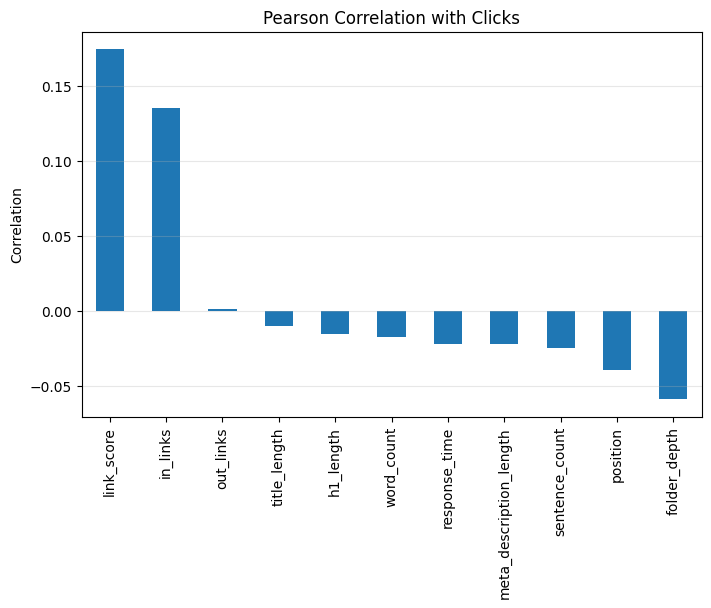

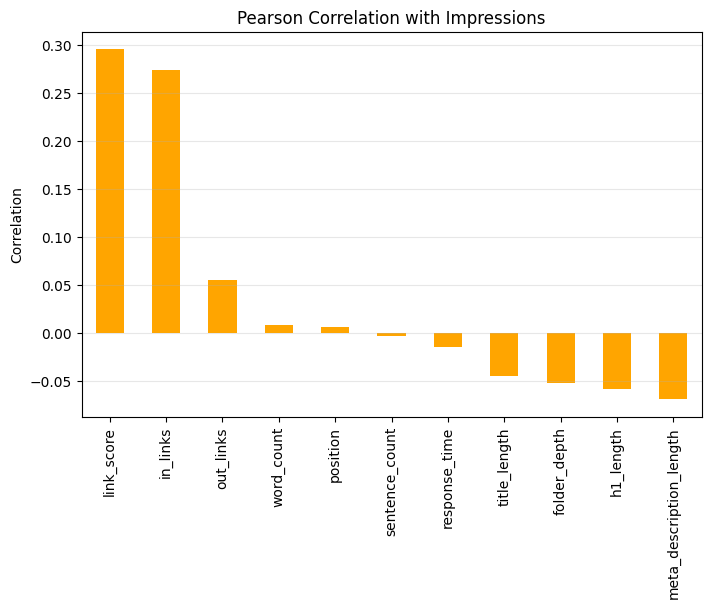

In [386]:
# --- Plot Pearson ---
plt.figure(figsize=(8,5))
pearson_corr.drop(['clicks', 'impressions']).sort_values(by='clicks', ascending=False)['clicks'].plot(kind='bar')
plt.title("Pearson Correlation with Clicks")
plt.ylabel("Correlation")
plt.grid(axis='y', alpha=0.3)

# Save the figure as PNG
plt.savefig("pearson_clicks.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
pearson_corr.drop(['clicks', 'impressions']).sort_values(by='impressions', ascending=False)['impressions'].plot(kind='bar', color='orange')
plt.title("Pearson Correlation with Impressions")
plt.ylabel("Correlation")
plt.grid(axis='y', alpha=0.3)

# Save the figure as PNG
plt.savefig("pearson_impressions.png", dpi=300)
plt.show()

The Pearson correlation analysis for both <code>clicks</code> and <code>impressions</code> reveals a consistent pattern: <code>link_score</code> and <code>in_links</code> have the strongest positive influence, meaning pages with higher-quality backlinks not only attract more clicks but also appear more often in search results. <code>out_links</code> provide a smaller boost, while factors like <code>title_length</code>, <code>meta_description_length</code>, <code>word_count</code>, and <code>sentence_count</code> show little to no direct impact on performance. In contrast, deeper <code>folder_depth</code>, slower <code>response_time</code>, lower <code>position</code>, and overly long titles or descriptions show slight negative effects, suggesting that complexity and inefficiency can hinder both visibility and engagement. Improving backlink quality and increasing <code>in_links</code> emerge as the most effective strategies for boosting SEO outcomes across both metrics.

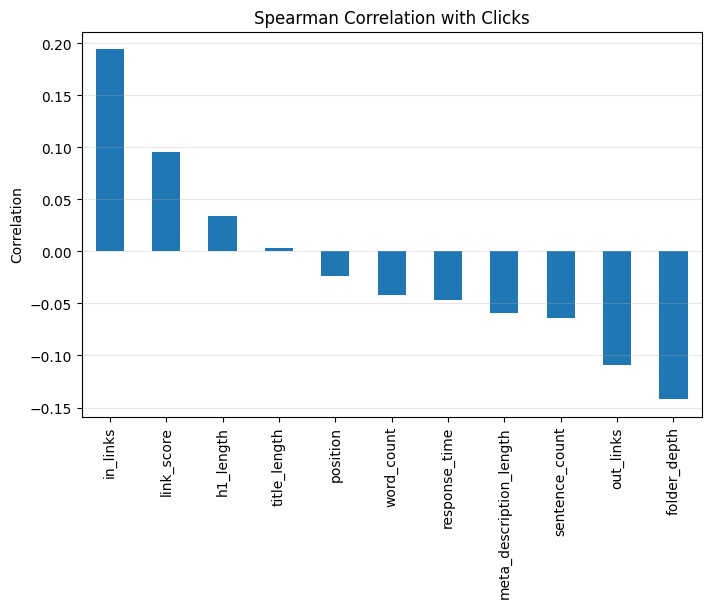

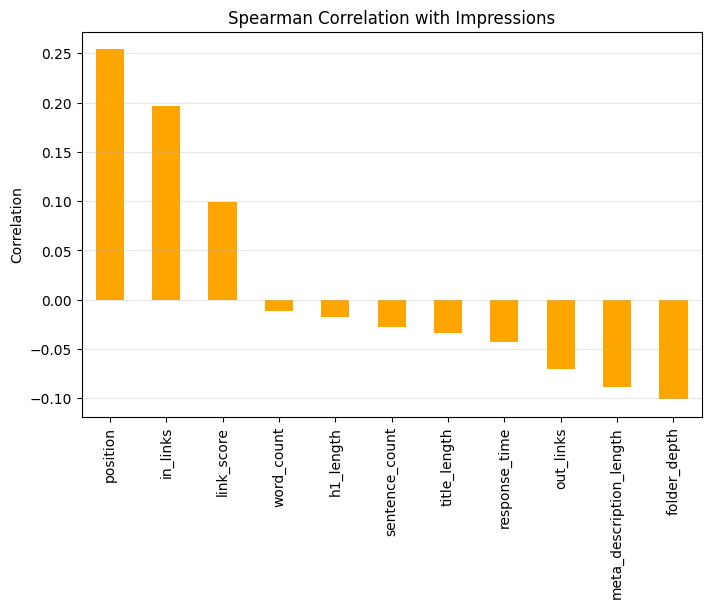

In [234]:
# --- Plot Spearman ---
plt.figure(figsize=(8,5))
spearman_corr.drop(['clicks', 'impressions']).sort_values(by='clicks', ascending=False)['clicks'].plot(kind='bar')
plt.title("Spearman Correlation with Clicks")
plt.ylabel("Correlation")
plt.grid(axis='y', alpha=0.3)

# Save the figure as PNG
plt.savefig("spearman_clicks.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
spearman_corr.drop(['clicks', 'impressions']).sort_values(by='impressions', ascending=False)['impressions'].plot(kind='bar', color='orange')
plt.title("Spearman Correlation with Impressions")
plt.ylabel("Correlation")
plt.grid(axis='y', alpha=0.3)

# Save the figure as PNG
plt.savefig("spearman_impressions.png", dpi=300)
plt.show()

The Spearman correlation analysis for <code>clicks</code> shows that <code>in_links</code>, <code>link_score</code>, and <code>h1_length</code> have the strongest positive associations, indicating that higher-quality backlinks, a greater number of backlinks, and well-structured headings are linked to better click performance. In contrast, deeper <code>folder_depth</code>, excessive <code>out_links</code>, and longer <code>meta_description_length</code> display negative relationships, suggesting potential navigation complexity or content over-optimization.

For <code>impressions</code>, the Spearman results highlight <code>position</code>, <code>in_links</code>, and <code>link_score</code> as the most influential factors — with better rankings and stronger backlink profiles consistently driving higher visibility. Negative correlations are again observed for <code>out_links</code>, <code>folder_depth</code>, and longer <code>meta_description_length</code>, implying that overly complex site structures and long snippets may reduce the frequency of appearances in search results.

Overall, the Spearman analysis underscores the importance of improving backlink quality, optimizing <code>h1_length</code>, and simplifying <code>folder_depth</code> to boost both visibility and engagement.

#### 4.2 Regression Model Correlation

In [226]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = numeric_df.drop(columns=['clicks', 'impressions'])
y_clicks = numeric_df['clicks']
y_impressions = numeric_df['impressions']

# Model for clicks
rf_clicks = RandomForestRegressor(random_state=42)
rf_clicks.fit(X, y_clicks)

# Model for impressions
rf_impressions = RandomForestRegressor(random_state=42)
rf_impressions.fit(X, y_impressions)

# Feature importances
fi_clicks = pd.Series(rf_clicks.feature_importances_, index=X.columns).sort_values(ascending=False)
fi_impressions = pd.Series(rf_impressions.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance for Clicks:\n", fi_clicks)
print("\nFeature Importance for Impressions:\n", fi_impressions)


Feature Importance for Clicks:
 link_score                 0.168119
in_links                   0.135880
folder_depth               0.117571
meta_description_length    0.104431
word_count                 0.078740
h1_length                  0.077337
response_time              0.076174
position                   0.072334
title_length               0.066550
sentence_count             0.063155
out_links                  0.039710
dtype: float64

Feature Importance for Impressions:
 in_links                   0.209385
link_score                 0.122601
position                   0.088482
word_count                 0.086475
sentence_count             0.086218
response_time              0.084619
title_length               0.081609
meta_description_length    0.074501
out_links                  0.066467
h1_length                  0.055814
folder_depth               0.043829
dtype: float64


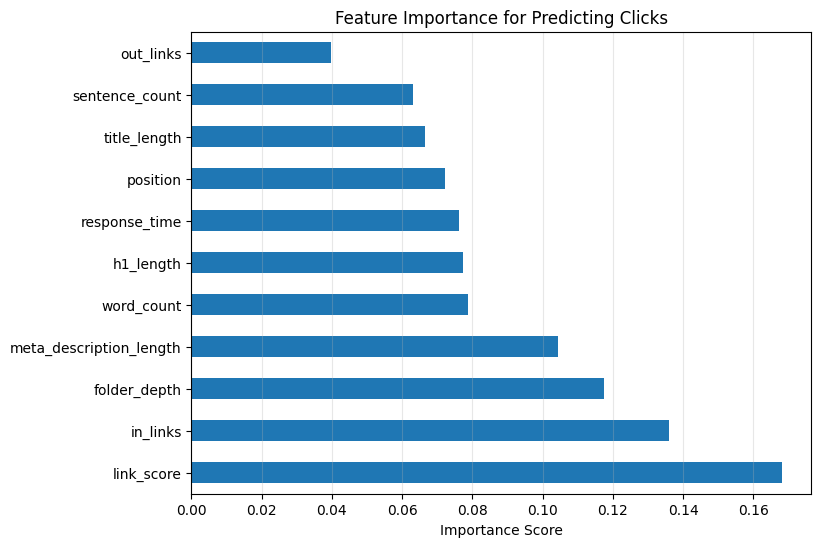

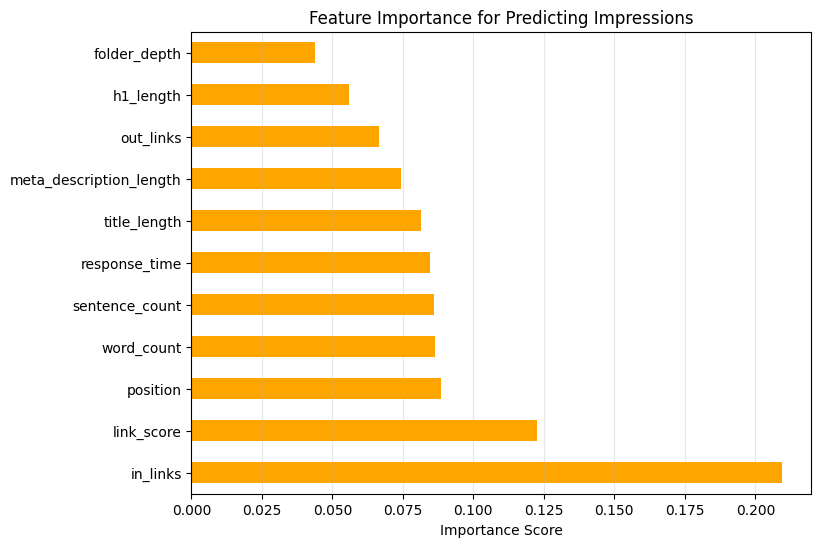

In [236]:
# --- Plot for Clicks ---
plt.figure(figsize=(8,6))
fi_clicks.plot(kind='barh')
plt.title("Feature Importance for Predicting Clicks")
plt.xlabel("Importance Score")
plt.grid(axis='x', alpha=0.3)

# Save the figure as PNG
plt.savefig("regression_clicks.png", dpi=300)
plt.show()

# --- Plot for Impressions ---
plt.figure(figsize=(8,6))
fi_impressions.plot(kind='barh', color='orange')
plt.title("Feature Importance for Predicting Impressions")
plt.xlabel("Importance Score")
plt.grid(axis='x', alpha=0.3)

# Save the figure as PNG
plt.savefig("regression_impressions.png", dpi=300)
plt.show()

The regression model’s feature importance analysis shows that <code>link_score</code> and <code>in_links</code> are the most influential factors for both <code>clicks</code> and <code>impressions</code>, with <code>link_score</code> leading for <code>clicks</code> and <code>in_links</code> leading for <code>impressions</code>. For <code>clicks</code>, <code>folder_depth</code> and <code>meta_description_length</code> also play notable roles, suggesting that site structure and well-crafted descriptions can influence user engagement. In contrast, <code>out_links</code> have the least impact on <code>clicks</code>. For <code>impressions</code>, <code>position</code> emerges as another key factor, indicating that higher rankings directly improve visibility. Metrics like <code>folder_depth</code> and <code>h1_length</code> contribute minimally to <code>impressions</code>, reinforcing that link authority and ranking position are far stronger levers for search visibility. Overall, strengthening backlink quality and quantity remains the most impactful strategy for improving both <code>clicks</code> and <code>impressions</code>.

#### 4.3 SUMMARY OF CORRELATION ANALYSIS

<div style="background-color:#e6f4ea; padding:10px; border-radius:5px;">
The correlation analyses reveal a consistent and clear picture of the factors most strongly influencing both <code>clicks</code> and <code>impressions</code>. Across Pearson, Spearman, and regression results, <code>link_score</code> and <code>in_links</code> consistently emerge as the most powerful drivers, showing that higher-quality backlinks and a greater number of inbound links not only increase engagement but also improve search visibility. <code>position</code> is another critical factor for <code>impressions</code>, confirming that higher rankings directly enhance exposure.  

While <code>out_links</code> can provide a small boost, they are far less impactful than inbound link quality and quantity. Metrics such as <code>title_length</code>, <code>meta_description_length</code>, <code>word_count</code>, and <code>sentence_count</code> show little to no direct positive effect, and in some cases — especially when excessively long — they correlate negatively with performance. Similarly, deeper <code>folder_depth</code> and slower <code>response_time</code> are associated with poorer results, suggesting that complex site structures and slower-loading pages hinder both visibility and engagement.  

The combined evidence indicates that the most effective SEO improvements will come from strengthening backlink authority, streamlining site architecture, refining <code>h1_length</code> for clarity, and ensuring concise, well-crafted meta descriptions. These strategies target the core drivers of search performance while addressing the structural and content-related weaknesses identified in the analysis.
</div>

# CONCLUSION & RECOMMENDATIONS

This project began with thorough data preparation and cleaning to ensure accuracy, consistency, and usability. Key transformations included converting columns such as <code>position</code>, <code>bounce_rate</code>, <code>view_depth</code>, and <code>response_time</code> from object types to floats, standardizing column names to lowercase with underscores, and renaming key metrics like <code>bouncerate</code> to <code>bounce_rate</code>. Irrelevant fields such as <code>timespent</code>, <code>robotsvisits</code>, and <code>mobility</code> were removed to focus on SEO-relevant features. Missing values in the <code>segments</code> column were normalized by replacing variations of "nan" with <code>unknown</code>, and rows with more than three missing values were dropped, resulting in a cleaner dataset ready for analysis.

The exploratory data analysis (EDA) phase involved calculating the overall <code>ctr</code> using the formula <code>(clicks / impressions) * 100</code> and engineering a <code>ctr</code> column for each page. Initial statistics revealed an overall site CTR of 1.79%, with an average Google position of 14. Segment-level exploration showed varying performance patterns across <code>unknown</code>, <code>brands</code>, <code>product</code>, and <code>catalog</code> segments, with visualizations highlighting relationships between ranking positions and metrics such as <code>title_length</code>, <code>word_count</code>, <code>in_links</code>, <code>out_links</code>, and <code>response_time</code>. Key patterns included high impressions but low CTR for positions 6–9, indicating opportunities for snippet optimization and content refinement.

To better understand the drivers of SEO performance, Pearson and Spearman correlation analyses, along with a regression model, were conducted for both <code>clicks</code> and <code>impressions</code>. Across all methods, <code>link_score</code> and <code>in_links</code> consistently emerged as the strongest positive influences, confirming that backlink quality and quantity are crucial for both engagement and visibility. The Pearson analysis highlighted the negative impacts of excessive <code>folder_depth</code>, slower <code>response_time</code>, and overly long <code>title_length</code> or <code>meta_description_length</code>. The Spearman results reinforced the importance of <code>h1_length</code> for <code>clicks</code> while identifying overly complex site structures as a hindrance to performance. The regression model further validated these findings, with <code>link_score</code> leading for <code>clicks</code>, <code>in_links</code> leading for <code>impressions</code>, and <code>position</code> emerging as a key factor for visibility.

Overall, the combined data preparation, EDA, visualizations, and correlation modeling provide clear direction for SEO optimization. Strengthening <code>link_score</code> and <code>in_links</code> will significantly improve both rankings and visibility, reducing <code>folder_depth</code> will simplify navigation and improve search performance, and refining <code>meta_description_length</code> and <code>h1_length</code> will help boost CTR for mid-ranking pages.  

Based on these discoveries, the following targeted recommendations are proposed:  
First, enhance backlink strategies by prioritizing high-authority, relevant sources to improve both <code>link_score</code> and <code>in_links</code>. Second, streamline site architecture by reducing <code>folder_depth</code> to improve crawl efficiency and make key pages more accessible to search engines. Third, optimize page presentation by crafting concise, keyword-rich <code>meta_description_length</code> and ensuring <code>h1_length</code> is both clear and compelling. Implementing these strategies will address the key performance gaps identified and lead to measurable improvements in rankings, impressions, and CTR.
